**Longest common subsequence**

In [2]:
x = "ABCBDAB"
y = "BDCABA"


def solve(x, y, m, n):
    if m < 0 or n < 0:  # will check till last element for M,N cases return at 0
        return 0
    if x[m] == y[n]:
        return 1 + solve(x, y, m - 1, n - 1)
    return max(solve(x, y, m - 1, n), solve(x, y, m, n - 1))


solve(x, y, len(x) - 1, len(y) - 1)


def solve(x, y, m, n, count):
    if m < 0 or n < 0:  # will check till last element for M,N cases return at 0
        return count
    if x[m] == y[n]:
        return solve(x, y, m - 1, n - 1, count + 1)
    return max(solve(x, y, m - 1, n, count), solve(x, y, m, n - 1, count))


solve(x, y, len(x) - 1, len(y) - 1, 0)

4

In [3]:
def topdown(x, y, m, n, dp):
    if m == 0 or n == 0:
        return 0
    key = (m, n)
    if key not in dp:
        if x[m - 1] == y[n - 1]:
            dp[key] = 1 + topdown(x, y, m - 1, n - 1, dp)
        else:
            dp[key] = max(topdown(x, y, m - 1, n, dp), topdown(x, y, m, n - 1, dp))
    return dp[key]


topdown(x, y, len(x), len(y), {})

4

In [4]:
def tabulation(x, y):
    # we will compare string from 0 to n-1 for base case we will need extra r/c value
    dp = [[0 for j in range(len(y) + 1)] for i in range(len(x) + 1)]
    for i in range(len(x) + 1):
        dp[i][0] = 0  # for y of 0 len
    for j in range(len(y) + 1):
        dp[0][j] = 0  # for x of 0 len
    for i in range(1, len(x) + 1):  # start with 1 but check with i-1
        for j in range(1, len(y) + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = 1 + dp[i - 1][j - 1]
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp


def print_lcs(x, y, m, n, dp):
    if m == 0 or n == 0:
        return ""
    if x[m - 1] == y[n - 1]:
        return print_lcs(x, y, m - 1, n - 1, dp) + x[m - 1]
    if dp[m - 1][n] > dp[m][n - 1]:
        return print_lcs(x, y, m - 1, n, dp)
    else:
        return print_lcs(x, y, m, n - 1, dp)


def print_lcsall(x, y, m, n, dp):
    if m == 0 or n == 0:
        return [""]
    if x[m - 1] == y[n - 1]:
        out = print_lcsall(x, y, m - 1, n - 1, dp)
        for i in range(len(out)):
            out[i] = out[i] + x[m - 1]
        return out

    if dp[m - 1][n] > dp[m][n - 1]:
        return print_lcsall(x, y, m - 1, n, dp)
    if dp[m - 1][n] < dp[m][n - 1]:
        return print_lcsall(x, y, m, n - 1, dp)

    # if [m - 1][n] == dp[m][n - 1]
    return print_lcsall(x, y, m - 1, n, dp) + print_lcsall(x, y, m, n - 1, dp)


dp = tabulation(x, y)
print_lcsall(x, y, len(x), len(y), dp)

['BCBA', 'BCAB', 'BDAB']

**Longest common substring**

In [5]:
X = "ABC"
Y = "BABA"

m = len(X)
n = len(Y)


def solve(x, y, m, n, count):
    if m == 0 or n == 0:
        return count
    if x[m - 1] == y[n - 1]:
        return solve(x, y, m - 1, n - 1, count + 1)
    return max(count, solve(x, y, m - 1, n, 0), solve(x, y, m, n - 1, 0))


solve(X, Y, m, n, 0)

2

In [6]:
X = "ABC"
Y = "BABA"

m = len(X)
n = len(Y)


def topdown(x, y, m, n, count, dp):
    if m == 0 or n == 0:
        return count
    key = (m, n)
    if key not in dp:
        if x[m - 1] == y[n - 1]:
            dp[key] = topdown(x, y, m - 1, n - 1, count + 1, dp)
        else:
            dp[key] = max(
                count, topdown(x, y, m - 1, n, 0, dp), topdown(x, y, m, n - 1, 0, dp)
            )
    return dp[key]


topdown(X, Y, m, n, 0, {})

2

In [7]:
def tabulation(x, y):
    # we will compare string from 0 to n-1 for base case we will need extra r/c value
    dp = [[0 for j in range(len(y) + 1)] for i in range(len(x) + 1)]
    ans = -1
    for i in range(len(x) + 1):
        dp[i][0] = 0  # for y of 0 len
    for j in range(len(y) + 1):
        dp[0][j] = 0  # for x of 0 len
    for i in range(1, len(x) + 1):  # start with 1 but check with i-1
        for j in range(1, len(y) + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = 1 + dp[i - 1][j - 1]
                if dp[i][j] > ans:
                    ans = dp[i][j]
                    index = i
            else:
                dp[i][j] = 0  # max(dp[i - 1][j], dp[i][j - 1])
    return x[index - ans : index]


X = "ABC"
Y = "BABA"

tabulation(X, Y)

'AB'

**longest repeated subsequence**

In [142]:
#  Function to find the length of the longest repeated subsequence
# of substring `X[0…m-1]` and `X[0…n-1]`
def LRSLength(X, m, n):

    # return if the end of either string is reached
    if m == 0 or n == 0:
        return 0

    # if characters at index `m` and `n` matches and the index are different
    if X[m - 1] == X[n - 1] and m != n:
        return LRSLength(X, m - 1, n - 1) + 1

    # otherwise, if characters at index `m` and `n` don't match
    return max(LRSLength(X, m, n - 1), LRSLength(X, m - 1, n))


if __name__ == "__main__":

    X = "ATACTCGGA"
    m = len(X)

    print("The length of the longest repeating subsequence is", LRSLength(X, m, m))

The length of the longest repeating subsequence is 4



*A Ninja has an ‘N’ Day training schedule. He has to perform one of these three activities (Running, Fighting Practice, or Learning New Moves) each day. There are merit points associated with performing an activity each day. The same activity can’t be performed on two consecutive days. We need to find the maximum merit points the ninja can attain in N Days.*
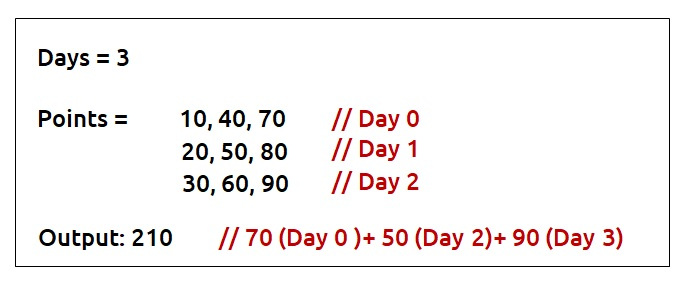

In [3]:
def f(day, last, points, dp):
    # Check if the result for this day and last activity is already computed.
    if dp[day][last] != -1:
        return dp[day][last]

    # Base case: When we reach day 0, return the maximum point for the last day.
    if day == 0:
        maxi = 0
        for i in range(3):
            if i != last:
                maxi = max(maxi, points[0][i])
        dp[day][last] = maxi
        return dp[day][last]

    maxi = 0
    # Iterate through all activities for the current day.
    for i in range(3):
        if i != last:
            # Calculate the total points for the current day's activity and recursively call for the previous day.
            activity = points[day][i] + f(day - 1, i, points, dp)
            maxi = max(maxi, activity)

    # Store the maximum points in the DP table and return it.
    dp[day][last] = maxi
    return dp[day][last]


def ninjaTraining(n, points):
    # Initialize a DP table to store the computed results.
    dp = [[-1 for j in range(3)] for i in range(n)]
    # Start the recursive function from the last day with no previous activity.
    return f(n - 1, -1, points, dp)


def main():
    # Define the points matrix for each day.
    points = [[10, 40, 70], [20, 50, 80], [30, 60, 90]]

    n = len(points)  # Get the number of days.
    # Call the ninjaTraining function to find the maximum points.
    print(ninjaTraining(n, points))


if __name__ == "__main__":
    main()

210


**K frog Jump**

In [ ]:
# Recursive function to calculate the minimum cost to reach the end
# from a given index with at most 'k' jumps.
import sys


def solveUtil(ind, height, dp, k):
    # Base case: If we are at the beginning (index 0), no cost is needed.
    if ind == 0:
        return 0
    # If the result for this index has been previously calculated, return it.
    if dp[ind] != -1:
        return dp[ind]

    mmSteps = sys.maxsize

    # Loop to try all possible jumps from '1' to 'k'
    for j in range(1, k + 1):
        # Ensure that we do not jump beyond the beginning of the array
        if ind - j >= 0:
            # Calculate the cost for this jump and update mmSteps with the minimum cost
            jump = solveUtil(ind - j, height, dp, k) + abs(
                height[ind] - height[ind - j]
            )
            mmSteps = min(jump, mmSteps)

    # Store the minimum cost for this index in the dp array and return it.
    dp[ind] = mmSteps
    return dp[ind]


# Function to find the minimum cost to reach the end of the array
def solve(n, height, k):
    dp = [-1] * n  # Initialize a memoization array to store calculated results
    return solveUtil(n - 1, height, dp, k)  # Start the recursion from the last index


def main():
    height = [30, 10, 60, 10, 60, 50]
    n = len(height)
    k = 2
    print(solve(n, height, k))  # Print the result of the solve function


if __name__ == "__main__":
    main()

**longest repeated substring**

In [144]:
def LRSLength(X, m, n, count):

    # return if the end of either string is reached
    if m == 0 or n == 0:
        return count

    # if characters at index `m` and `n` matches and the index are different
    if X[m - 1] == X[n - 1] and m != n:
        return LRSLength(X, m - 1, n - 1, count + 1)

    # otherwise, if characters at index `m` and `n` don't match
    return max(count, LRSLength(X, m, n - 1, 0), LRSLength(X, m - 1, n, 0))


if __name__ == "__main__":

    X = "banana"
    m = len(X)

    print("The length of the longest repeating subsequence is", LRSLength(X, m, m, 0))

The length of the longest repeating subsequence is 3


In [19]:
def LRSLength(x):
    n = len(x)
    dp = [[0 for i in range(n + 1)] for j in range(n + 1)]
    size = -1
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            if x[i - 1] == x[j - 1] and i != j:
                dp[i][j] = dp[i - 1][j - 1] + 1
            if dp[i][j] > size:
                size = dp[i][j]

    return size


if __name__ == "__main__":

    X = "abcd"
    m = len(X)
    print(LRSLength(X))

0


**Longest repeating and non-overlapping substring**

In [4]:
def longestSubstring(s):
    ln = len(s)

    res = "-1"

    l = 0

    r = 0

    for r in range(ln):

        substr = s[l : r + 1]

        if s.find(substr, r + 1) != -1:

            res = substr

        else:

            l += 1

    return res


s = "geeksforgeeks"
longestSubstring(s)

'geeks'

In [21]:
def longestRepeatedSubstring(str):

    n = len(str)
    LCSRe = [[0 for x in range(n + 1)] for y in range(n + 1)]

    res = ""  # To store result
    res_length = 0  # To store length of result

    # building table in bottom-up manner
    index = 0
    for i in range(1, n + 1):
        for j in range(i + 1, n + 1):

            # (j-i) > LCSRe[i-1][j-1] to remove
            # overlapping
            if str[i - 1] == str[j - 1] and LCSRe[i - 1][j - 1] < (j - i):
                LCSRe[i][j] = LCSRe[i - 1][j - 1] + 1

                # updating maximum length of the
                # substring and updating the finishing
                # index of the suffix
                if LCSRe[i][j] > res_length:
                    res_length = LCSRe[i][j]
                    index = max(i, index)

            else:
                LCSRe[i][j] = 0

    # If we have non-empty result, then insert
    # all characters from first character to
    # last character of string
    if res_length > 0:
        for i in range(index - res_length + 1, index + 1):
            res = res + str[i - 1]

    return res


# Driver Code
if __name__ == "__main__":

    str = "geeksforgeeks"
    print(longestRepeatedSubstring(str))

geeks


**longest increasing subsequence**

In [8]:
arr = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
n = len(arr)


def solve(arr, i, n, prev):
    if i > n:
        return 0
    exc = solve(arr, i + 1, n, prev)
    inc = 0
    if prev < arr[i]:
        inc = 1 + solve(arr, i + 1, n, arr[i])
    return max(inc, exc)


solve(arr, 0, n - 1, -1)

6

In [2]:
import bisect


def solve(arr):
    n = len(arr)
    temp = []
    ans = 1
    temp.append(arr[0])
    for i in range(1, n):
        if arr[i] > temp[-1]:
            temp.append(arr[i])
            ans += 1
        else:
            index = bisect.bisect_left(temp, arr[i])
            temp[index] = arr[i]
    return ans  # temp will not follow arr subsequence property


arr = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
solve(arr)

6

In [6]:
def topdown(arr):
    n = len(arr)
    li = [0] * n
    li[0] = 1

    for i in range(1, n):
        for j in range(i):
            if arr[j] < arr[i] and li[j] > li[i]:  # arr[j] can be in arr[i]
                li[i] = li[j]
        li[i] += 1
    return li


arr = [10, 9, 2, 5, 3, 7, 101, 18]
topdown(arr)

[1, 1, 1, 2, 2, 3, 4, 4]

In [5]:
def topdown(arr):
    n = len(arr)
    li = [[] for _ in range(len(arr))]
    li[0].append(arr[0])  # store subsequence ending at i for all n
    for i in range(1, n):
        for j in range(i):
            if arr[j] < arr[i] and len(li[j]) > len(li[i]):  # arr[j] can be in arr[i]
                li[i] = li[j].copy()
        li[i].append(arr[i])
    return li


arr = [10, 9, 2, 5, 3, 7, 101, 18]
topdown(arr)

[[10], [9], [2], [2, 5], [2, 3], [2, 5, 7], [2, 5, 7, 101], [2, 5, 7, 18]]

**Longest Alternating Subsequence Problem**

In [24]:
# arr = [8, 9, 6, 4, 5, 7, 3, 2, 4]  # 6
# arr = [10, 22, 9, 33, 49, 50, 31, 60]  # 6
# arr = [1, 5, 4] 3
arr = [1, 17, 5, 10, 13, 15, 10, 5, 16, 8]  # 7
n = len(arr)

# Fix the first element and recur for the remaining elements as the first
# element will always be part of the longest subsequence (why?)

# There are two possibilities:

# 1. The next element is greater (pass true)
# 2. The next element is smaller (pass false)


def solve(arr, i, n, check, prev):

    if i > n:
        return 0
    nopick = solve(arr, i + 1, n, check, prev)
    pick = -1
    if check == True and prev < arr[i]:  # check for increasing
        pick = 1 + solve(arr, i + 1, n, not check, arr[i])
    if check == False and prev > arr[i]:
        pick = 1 + solve(arr, i + 1, n, not check, arr[i])
    return max(pick, nopick)


1 + max(solve(arr, 1, n - 1, True, arr[0]), solve(arr, 1, n - 1, False, arr[0]))

7

In [25]:
# Function to find the length of the longest subsequence with alternate
# low and high elements.
def findLongestSequence(A):

    # base case
    if not A or len(A) <= 1:
        return len(A)

    # lookup table to store solutions to subproblems
    T = [[0] * 2 for r in range(len(A) + 1)]

    """
        `T[i][0]` stores the longest alternating subsequence till `A[0…i]`
        where `A[i]` is greater than `A[i-1]`
 
        `T[i][1]` stores the longest alternating subsequence till `A[0…i]`
        where `A[i]` is smaller than `A[i-1]`
    """

    # stores result
    result = 1

    # base case: the first element will always be part of LAS
    T[0][0] = T[0][1] = 1

    # fill the lookup table in a bottom-up manner
    for i in range(1, len(A)):

        # do for each element `A[j]` before `A[i]`
        for j in range(i):

            # If `A[i]` is greater than `A[j]`, update `T[i][0]`
            if A[i] > A[j]:
                T[i][0] = max(T[i][0], T[j][1] + 1)

            # If `A[i]` is smaller than `A[j]`, update `T[i][1]`
            if A[i] < A[j]:
                T[i][1] = max(T[i][1], T[j][0] + 1)

        # update result by taking a maximum of both values
        if result < max(T[i][0], T[i][1]):
            result = max(T[i][0], T[i][1])

    # return result
    return result


if __name__ == "__main__":

    A = [8, 9, 6, 4, 5, 7, 3, 2, 4]

    print(
        "The length of the longest alternating subsequence is", findLongestSequence(A)
    )

The length of the longest alternating subsequence is 6


**Longest Bitonic Subsequence**

**Maximum Sum Increasing Subsequence**

In [32]:
nums = [8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11]


def solve(nums, i, n, s, prev):
    if i > n:
        return s
    exc = solve(nums, i + 1, n, s, prev)
    inc = -1e3
    if prev < nums[i]:
        inc = solve(nums, i + 1, n, s + nums[i], nums[i])
    return max(inc, exc)


solve(nums, 0, len(nums) - 1, 0, -1)

34

In [13]:
# Iterative function to find the maximum sum of an increasing subsequence
def MSIS(nums):

    # base case
    if len(nums) == 0:
        return 0

    # list to store subproblem solutions. `sum[i]` stores the maximum
    # sum of the increasing subsequence that ends with `nums[i]`
    total = [0] * len(nums)

    # base case
    total[0] = nums[0]

    # start from the second element in the list
    for i in range(1, len(nums)):

        # do for each element in sublist `nums[0…i-1]`
        for j in range(i):

            # find increasing subsequence with the maximum sum that ends with
            # `nums[j]`, where `nums[j]` is less than the current element `nums[i]`
            if total[i] < total[j] and nums[i] > nums[j]:
                total[i] = total[j]

        # include `nums[i]` in MSIS
        total[i] += nums[i]

    # find increasing subsequence with the maximum sum
    return max(total)


if __name__ == "__main__":

    nums = [8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11]

    print("The maximum sum of the increasing subsequence is", MSIS(nums))

The maximum sum of the increasing subsequence is 34


**Edit Distance (Leveinstein)**

In [14]:
x = "kitten"
y = "sitting"


def solve(x, y, m, n):
    if n == 0:
        return m
    if m == 0:
        return n
    if x[m - 1] == y[n - 1]:
        return solve(x, y, m - 1, n - 1)
    return 1 + min(
        solve(x, y, m - 1, n - 1), solve(x, y, m - 1, n), solve(x, y, m, n - 1)
    )


solve(x, y, len(x), len(y))

3

**20. Minimum cost in grid**

*To Do: Print the path as well*

In [15]:
cost = [
    [4, 7, 8, 6, 4],
    [6, 7, 3, 9, 2],
    [3, 8, 1, 2, 4],
    [7, 1, 7, 3, 7],
    [2, 9, 8, 9, 3],
]


def tabulation(cost):
    m, n = len(cost), len(cost[0])
    dp = [[0 for j in range(n)] for i in range(m)]
    # for col == 0
    dp[0][0] = cost[0][0]
    for i in range(1, m):
        dp[i][0] = cost[i][0] + dp[i - 1][0]
    # for row==0
    for j in range(1, n):
        dp[0][j] = cost[0][j] + dp[0][j - 1]

    # for rest
    for i in range(1, m):
        for j in range(1, n):
            dp[i][j] = cost[i][j] + min(dp[i][j - 1], dp[i - 1][j])
    return dp[m - 1][n - 1]


tabulation(cost)

36

In [16]:
def solve(cost, m, n):
    if m == 0 and n == 0:
        return cost[0][0]
    if m < 0 or n < 0:
        return 1e5
    left = cost[m][n] + solve(cost, m, n - 1)
    up = cost[m][n] + solve(cost, m - 1, n)
    return min(left, up)


solve(cost, len(cost) - 1, len(cost[0]) - 1)

36

**Count the number of paths in a matrix with a given cost to reach the destination cell**

In [49]:
def solve(mat, m, n, cost, dp):
    if m == 0 and n == 0:
        if cost == mat[0][0]:
            return 1
        return 0

    if m < 0 or n < 0 or cost < 0:
        return 0

    if dp[m][n][cost] != -1:
        return dp[m][n][cost]

    left = solve(mat, m, n - 1, cost - mat[m][n], dp)
    up = solve(mat, m - 1, n, cost - mat[m][n], dp)
    dp[m][n][cost] = up + left
    return up + left


# cost = 12
# mat = [[1, 2, 3], [4, 6, 5], [3, 2, 1]]

# cost = 16

# mat = [[1, 2, 3], [4, 6, 5], [9, 8, 7]]

mat = [[4, 7, 1, 6], [5, 7, 3, 9], [3, 2, 1, 2], [7, 1, 6, 3]]

cost = 25
dp = [
    [[-1 for _ in range(cost + 1)] for _ in range(len(mat[0]))] for _ in range(len(mat))
]
m, n = len(mat), len(mat[0])
solve(mat, m - 1, n - 1, cost, dp)

2

In [37]:
# from 0,0 to last m-1,n-1 cell

mat = [[4, 7, 1, 6], [5, 7, 3, 9], [3, 2, 1, 2], [7, 1, 6, 3]]

cost = 25


def solve(mat, m, n, cost):
    if m == 0 and n == 0:
        if cost == mat[0][0]:
            return 1
        return 0
    # if m == 0:  # row 0 can only go left
    #     return solve(mat, m, n - 1, cost - mat[m][n])

    # if n == 0:  # can only go up
    #     return solve(mat, m - 1, n, cost - [m][n])
    if m < 0 or n < 0:
        return 0
    left = solve(mat, m, n - 1, cost - mat[m][n])
    up = solve(mat, m - 1, n, cost - mat[m][n])
    return up + left


solve(mat, 3, 3, 25)

2

**Ways to reach the bottom-right corner of a matrix with exactly `k` turns allowed**

In [50]:
# Function to check whether (i, j) is a valid matrix coordinate or not
def isValid(i, j, M, N):
    return 0 <= i < M and 0 <= j < N


# Recursive function to count the number of different ways to reach the last
# cell (M-1, N-1) of a matrix from the given cell (i, j) with `k` turns left.
# `isCol` flag is true when the current direction is along the column, false otherwise.
def totalWays(M, N, i, j, k, isCol):
    # If the number of turns is exhausted or if the cell is invalid
    if k == -1 or not isValid(i, j, M, N):
        return 0

    # If the destination is reached with exactly `k` turns
    if k == 0 and i == M - 1 and j == N - 1:
        return 1

    # If the current direction is along a column
    if isCol:
        # 1. Continue moving along the column
        # 2. Turn right and decrement the number of turns by 1
        return totalWays(M, N, i + 1, j, k, isCol) + totalWays(
            M, N, i, j + 1, k - 1, not isCol
        )

    # If the current direction is along a row
    # 1. Continue moving along the row
    # 2. Turn down and decrement the number of turns by 1
    return totalWays(M, N, i, j + 1, k, isCol) + totalWays(
        M, N, i + 1, j, k - 1, not isCol
    )


# Function to count the number of different ways to reach the bottom-right corner
# of a matrix from its top-left corner with exactly `k` turns allowed
def findTotalWays(M, N, k, i=0, j=0):
    # Recur by moving along a column and a row.
    return totalWays(M, N, i + 1, j, k, True) + totalWays(M, N, i, j + 1, k, False)


if __name__ == "__main__":

    # `M × N` matrix
    M = N = 3

    # Number of turns
    k = 2

    print("The total number of ways is", findTotalWays(M, N, k))

The total number of ways is 2


**0/1 Knapscak**

In [52]:
value = [20, 5, 10, 40, 15, 25]
weight = [1, 2, 3, 8, 7, 4]
w = 10


def solve(value, weight, w, n):
    if w < 0:
        return -1e5
    if n == 0:
        if w >= weight[0]:
            return value[0]
        return 0
    exc = solve(value, weight, w, n - 1)
    inc = -1e5
    if w > weight[n]:
        inc = value[n] + solve(value, weight, w - weight[n], n - 1)
    return max(exc, inc)


solve(value, weight, w, len(value) - 1)

60

In [122]:
def topdown(value, weight, w, n, dp):
    if w < 0:
        return -1e5
    if n == 0:
        if w <= weight[0]:
            return value[0]
        return 0
    key = (n, w)
    if key not in dp:
        exc = topdown(value, weight, w, n - 1, dp)
        inc = -1e5
        if w > weight[n]:
            inc = value[n] + topdown(value, weight, w - weight[n], n - 1, dp)
        dp[key] = max(exc, inc)
    return dp[key]


topdown(value, weight, w, len(value) - 1, {})

60

In [125]:
def tabulation(value, weight, w):
    n = len(value)
    dp = [[0 for j in range(w + 1)] for i in range(n)]
    # foe w == 0 proft = 0
    for i in range(n):
        dp[i][0] = 0
    # for index ,i = 0
    for j in range(weight[0], w + 1):
        dp[0][j] = value[0]

    for i in range(1, n):
        for j in range(1, w + 1):  # w
            exc = dp[i - 1][j]  # profit will be same as previous
            inc = -1e5
            if weight[i] <= j:
                inc = (
                    value[i] + dp[i - 1][j - weight[i]]
                )  # current proft + w-currentw previous max profit
            dp[i][j] = max(exc, inc)
    return dp, dp[n - 1][w]


dp, ans = tabulation(value, weight, w)
print(ans)

30


In [135]:
def printknapSack(W, wt, val, n):
    K = [[0 for w in range(W + 1)] for i in range(n)]

    # Build table K[][] in bottom
    # up manner
    for j in range(wt[0], W + 1):
        K[0][j] = val[0]
    for i in range(n):
        for w in range(W + 1):
            # if i == 0 or w == 0:
            #     K[i][w] = 0
            if wt[i] <= w:
                K[i][w] = max(val[i] + K[i - 1][w - wt[i]], K[i - 1][w])
            else:
                K[i][w] = K[i - 1][w]

    # stores the result of Knapsack
    res = K[n - 1][W]
    print(res)

    w = W
    for i in range(n - 1, 0, -1):
        if res <= 0:
            break
        # either the result comes from the
        # top (K[i-1][w]) or from (val[i-1]
        # + K[i-1] [w-wt[i-1]]) as in Knapsack
        # table. If it comes from the latter
        # one/ it means the item is included.
        if res == K[i - 1][w]:
            continue
        else:

            # This item is included.
            print(wt[i])

            # Since this weight is included
            # its value is deducted
            res = res - val[i]
            w = w - wt[i]


# Driver code
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)

printknapSack(W, wt, val, n)

220
30
20


**Unbounded Knapsack (Repetition of items allowed)**

In [110]:
def unboundedKnapsack(W, index, val, wt):

    # Base case of recursion when only one element is there.
    if index == 0:
        return (W // wt[0]) * val[0]
    # If the element with referred by index is doesn't occur even once in the required solution
    notTake = 0 + unboundedKnapsack(W, index - 1, val, wt)
    # If the element is occur atleast once in the required solution
    take = -100000
    if wt[index] <= W:
        take = val[index] + unboundedKnapsack(W - wt[index], index, val, wt)
    return max(take, notTake)


# Driver program
W = 100
val = [10, 30, 20]
wt = [5, 10, 15]
n = len(val)

print(unboundedKnapsack(W, n - 1, val, wt))

300


**Subset equal sum OR subset with sum equal k**

In [21]:
nums = [3, 1, 1, 2, 2, 1]
# nums = [7, 3, 1, 5, 4, 8]
s = sum(nums) // 2  # if sum is odd ans False


def solve(nums, n, s):
    if n == 0:  # or n<0 s == 0 true else false
        if s == nums[n]:
            return True
        return False
    if s < 0:
        return False
    exc = solve(nums, n - 1, s)
    inc = False
    if s >= nums[n]:
        inc = solve(nums, n - 1, s - nums[n])
    return exc or inc


solve(nums, len(nums) - 1, s)

True

In [79]:
# nums = [3, 1, 1, 2, 2, 1]
nums = [7, 3, 1, 5, 4, 8]
s = sum(nums) // 2  # if sum is odd ans False


def solve(nums, i, n, s1, s2, ans1, ans2):
    if i == n:
        if s1 == s2:
            print(ans1, ans2)
            return True
        return False
    # if s < 0:
    #     return False
    ans1.append(nums[i])
    in1 = solve(nums, i + 1, n, s1 + nums[i], s2, ans1, ans2)
    # if in1:
    #     return in1
    ans1.pop()
    ans2.append(nums[i])

    in2 = solve(nums, i + 1, n, s1, s2 + nums[i], ans1, ans2)
    # if in2:
    #     return in2
    ans2.pop()
    return in2


ans1 = []
ans2 = []
solve(nums, 0, len(nums), 0, 0, ans1, ans2)

[7, 3, 4] [1, 5, 8]
[1, 5, 8] [7, 3, 4]


False

In [78]:
# nums = [3, 1, 1, 2, 2, 1]
nums = [7, 3, 1, 5, 4, 8]
s = sum(nums) // 2  # if sum is odd ans False


def solve(nums, i, n, s1, s2, ans1, ans2):
    if i == n:
        if s1 == s2:
            print(ans1, ans2)
            return True
        return False
    # if s < 0:
    #     return False
    ans1.append(nums[i])
    in1 = solve(nums, i + 1, n, s1 + nums[i], s2, ans1, ans2)
    if in1:  # will print one one solution
        return in1
    ans1.pop()
    ans2.append(nums[i])

    in2 = solve(nums, i + 1, n, s1, s2 + nums[i], ans1, ans2)
    # if in2:
    #     return in2
    ans2.pop()
    return in2 or in1


ans1 = []
ans2 = []
solve(nums, 0, len(nums), 0, 0, ans1, ans2)

[7, 3, 4] [1, 5, 8]


True

In [77]:
# nums = [7, 3, 1, 5, 4, 8]
nums = [3, 1, 1, 2, 2, 1]
s = sum(nums) // 2  # if sum is odd ans False


def solve(nums, i, s1, ans1):
    if i == 0:
        if s1 == nums[i]:
            ans1.insert(
                0, nums[i]
            )  # last to frist append will chane the order of output subsequence
            print(ans1)
            ans1.pop(0)
            return True
        return False
    in2 = solve(nums, i - 1, s1, ans1)
    # if in2: #as sooon we found a solution we return it #will print only one solution
    #     return True
    in1 = False
    if nums[i] <= s:
        ans1.append(nums[i])
        in1 = solve(nums, i - 1, s1 - nums[i], ans1)
        # if in1:
        #     return in1
        ans1.pop()

    return in2 or in1


ans1 = []
solve(nums, len(nums) - 1, s, ans1)

[7, 4, 3]


True

In [23]:
# nums = [7, 3, 1, 5, 4, 8]
nums = [3, 1, 1, 2, 2, 1]
s = sum(nums) // 2  # if sum is odd ans False


def solve(nums, i, s1, ans1):
    if i == 0:
        if s1 == nums[i]:
            ans1.insert(
                0, nums[i]
            )  # last to frist append will chane the order of output subsequence
            print(ans1)
            return True
        return False
    ans1.append(nums[i])
    in1 = solve(nums, i - 1, s1 - nums[i], ans1)
    if in1:  # as sson as we found true we return it #will print only one solution
        return in1
    ans1.pop()

    in2 = solve(nums, i - 1, s1, ans1)

    return in2


ans1 = []
solve(nums, len(nums) - 1, s, ans1)

[3, 1, 1]


True

In [26]:
# nums = [7, 3, 2, 5, 8]
# k = 14
nums = [7, 3, 2, 5, 8]
k = 18
ans1 = []
solve(nums, len(nums) - 1, k, ans1)

[7, 8, 3]


True

In [27]:
nums = [7, 3, 2, 5, 8]
k = 14


# solve(nums, 0, len(nums) - 1, k)
def tabulation(nums, k):
    s = k
    n = len(nums)
    dp = [[False for j in range(s + 1)] for i in range(n)]
    # for s== 0 set it True
    for i in range(n):
        dp[i][0] = True

    # frist element this condi does not affect output
    if nums[0] <= s:
        dp[0][nums[0]] = True

    for i in range(1, n):
        for j in range(1, s + 1):
            exc = dp[i - 1][j]
            inc = False
            if j >= nums[i]:
                inc = dp[i - 1][j - nums[i]]
            dp[i][j] = inc or exc
    return dp[n - 1][s]


tabulation(nums, k)

True

In [28]:
def tabulation(nums):
    s = sum(nums) // 2
    n = len(nums)
    dp = [[False for j in range(s + 1)] for i in range(n)]
    # for s== 0 set it True
    for i in range(n):
        dp[i][0] = True

    # frist element this condi does not affect output
    if nums[0] <= s:
        dp[0][nums[0]] = True

    for i in range(1, n):
        for j in range(1, s + 1):
            exc = dp[i - 1][j]
            inc = False
            if j >= nums[i]:
                inc = dp[i - 1][j - nums[i]]
            dp[i][j] = inc or exc
    return dp[n - 1][s]


# nums = [3, 1, 1, 2, 2, 1]
nums = [7, 3, 1, 5, 4, 8]
tabulation(nums)

True

**3–Partition Problem disjoint set (no common element)**


*printing the subsequence of ksum or equal partition is trickey compare to 3-partion becuase in 3-pa every array will go into  one of 3*

In [29]:
def isSubsetExist(S, n, a, b, c, list):

    # return true if the subset is found
    if a == 0 and b == 0 and c == 0:
        return True

    # base case: no items left
    if n < 0:
        return False

    # Case 1. The current item becomes part of the first subset
    A = False
    if a - S[n] >= 0:
        list[n] = 1  # current element goes to the first subset
        A = isSubsetExist(S, n - 1, a - S[n], b, c, list)

    # Case 2. The current item becomes part of the second subset
    B = False
    if not A and (b - S[n] >= 0):
        list[n] = 2  # current element goes to the second subset
        B = isSubsetExist(S, n - 1, a, b - S[n], c, list)

    # Case 3. The current item becomes part of the third subset
    C = False
    if (not A and not B) and (c - S[n] >= 0):
        list[n] = 3  # current element goes to the third subset
        C = isSubsetExist(S, n - 1, a, b, c - S[n], list)

    # return true if we get a solution
    return A or B or C


# Function for solving the 3–partition problem. It prints the subset if
# given set `S[0…n-1]` can be divided into three subsets with an equal sum
def partition(S):

    # get the sum of all elements in the set
    total = sum(S)

    # construct a list to track the subsets
    # `A[i] = k` represents i'th item of `S` is part of k'th subset
    A = [None] * len(S)

    # set result to true if the sum is divisible by 3 and the set `S` can
    # be divided into three subsets with an equal sum
    result = (
        (len(S) >= 3)
        and (total % 3) == 0
        and isSubsetExist(S, len(S) - 1, total / 3, total / 3, total / 3, A)
    )

    if not result:
        print("3-Partition of set is not possible")
        return

    # print the partitions
    for i in range(3):
        print(f"Partition {i} is", [S[j] for j in range(len(S)) if A[j] == i + 1])


if __name__ == "__main__":

    # Input: a set of integers
    S = [7, 3, 2, 1, 5, 4, 8]
    partition(S)

Partition 0 is [2, 8]
Partition 1 is [1, 5, 4]
Partition 2 is [7, 3]


**K partition array**

In [30]:
# Function to check if all subsets are filled or not
def checkSum(sumLeft, k):

    r = True
    for i in range(k):
        if sumLeft[i]:
            r = False

    return r


# Helper function for solving `k` partition problem.
# It returns true if there exist `k` subsets with the given sum
def subsetSum(S, n, sumLeft, A, k):

    # return true if a subset is found
    if checkSum(sumLeft, k):
        return True

    # base case: no items left
    if n < 0:
        return False

    result = False

    # consider current item `S[n]` and explore all possibilities
    # using backtracking
    for i in range(k):
        if not result and (sumLeft[i] - S[n]) >= 0:

            # mark the current element subset
            A[n] = i + 1

            # add the current item to the i'th subset
            sumLeft[i] = sumLeft[i] - S[n]

            # recur for remaining items
            result = subsetSum(S, n - 1, sumLeft, A, k)

            # backtrack: remove the current item from the i'th subset
            sumLeft[i] = sumLeft[i] + S[n]

    # return true if we get a solution
    return result


# Function for solving k–partition problem. It prints the subsets if
# set `S[0…n-1]` can be divided into `k` subsets with equal sum
def partition(S, k):

    # get the total number of items in `S`
    n = len(S)

    # base case
    if n < k:
        print("k-partition of set S is not possible")
        return

    # get the sum of all elements in the set
    total = sum(S)
    A = [None] * n

    # create a list of size `k` for each subset and initialize it
    # by their expected sum, i.e., `sum/k`
    sumLeft = [total // k] * k

    # return true if the sum is divisible by `k` and set `S` can
    # be divided into `k` subsets with equal sum
    result = (total % k) == 0 and subsetSum(S, n - 1, sumLeft, A, k)

    if not result:
        print("k-partition of set S is not possible")
        return

    # print all k–partitions
    for i in range(k):
        print(f"Partition {i} is", [S[j] for j in range(n) if A[j] == i + 1])


if __name__ == "__main__":

    # Input: a set of integers
    S = [7, 3, 5, 12, 2, 1, 5, 3, 8, 4, 6, 4]
    k = 5

    partition(S, k)

Partition 0 is [2, 6, 4]
Partition 1 is [8, 4]
Partition 2 is [3, 1, 5, 3]
Partition 3 is [12]
Partition 4 is [7, 5]


**Minimum Sum Partition Problem**

*S1-S2 should be minimum S1,S2 are partition sum*

In [8]:
nums = [10, 20, 15, 5, 25]


def solve(nums, n, s1, s2, ans):
    if n < 0:
        return abs(s1 - s2)

    in1 = solve(nums, n - 1, s1 + nums[n], s2, ans)
    in2 = solve(nums, n - 1, s1, s2 + nums[n], ans)
    return min(in1, in2)


solve(nums, len(nums) - 1, 0, 0, 1e3)

5

In [20]:
nums = [10, 20, 15, 5, 25]
solve(nums, len(nums) - 1, 1e3)

0

In [6]:
solve(nums, len(nums) - 1, 0, 0, 1e3)
# printing s1+s2 = s,s1-s2 = 5
# get s1,s2 use above cell code to get subsequence

5

**Rod Cutting Problem**

In [33]:
# rod can be cut multiple times on same length
price = [1, 5, 8, 9, 10, 17, 17, 20]
# rod length
n = 4


def solve(price, i, n, ans):
    if i == 0:  # rod len 1
        return n * price[i]
    nocut = solve(price, i - 1, n, ans)
    cut = -1e5
    rlen = i + 1
    if n >= rlen:
        cut = price[i] + solve(
            price, i, n - rlen, ans
        )  # rod can be cut into same len multiple times
    return max(cut, nocut)


solve(price, n - 1, n, -1)

10

In [34]:
def solve(price, i, n, dp):
    if i == 0:
        return n * price[i]
    key = (i, n)
    if key not in dp:
        nocut = solve(price, i - 1, n, dp)
        cut = -1e5
        rlen = i + 1
        if n >= rlen:
            cut = price[i] + solve(
                price, i, n - rlen, dp
            )  # rod can be cut into same len multiple times
        dp[key] = max(cut, nocut)
    return dp[key]


solve(price, n - 1, n, {})

10

In [35]:
import numpy as np

price = [2, 5, 7, 8]
n = 5

# Make an initial grid of all zeros
T = np.zeros((len(price), n + 1))

for i in range(0, len(price)):
    for j in range(0, n + 1):

        # First column => 0 length of rod => 0 profit
        if j == 0:
            continue

        # First row => T[i-1,j] doesn't exist so just pick the second value
        elif i == 0:
            T[i, j] = price[i] + T[i, j - i - 1]

        # where j <= i => T[i, j-i-1] doesn't exist so just pick the first value
        elif (j - i - 1) < 0:
            T[i, j] = T[i - 1, j]

        # using the whole expression
        else:
            T[i, j] = max(T[i - 1, j], (price[i] + T[i, j - i - 1]))

# Answer in the extreme bottom right cell
print("Maximum profit is", T[len(price) - 1, n])

Maximum profit is 12.0


In [83]:
price = [1, 5, 8, 9, 10, 17, 17, 20]
n = 8


def tabulation(price, n):
    matrix = [0] * (
        n + 1
    )  # stores the maximum profit achieved from a rod of length `i`
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            # divide the rod of length `i` into two rods of length `j`
            # and `i-j` each and take maximum
            if i <= j:
                matrix[j] = max(price[i - 1] + matrix[j - i], matrix[j])

    return matrix[n]


tabulation(price, n)

22

In [85]:
def solve_(n, price):
    dp = [[0 for j in range(n + 1)] for i in range(n)]
    for j in range(1, n + 1):
        dp[0][j] = price[0] * j
    for i in range(n):
        dp[i][1] = price[0]

    for i in range(1, n):
        for j in range(2, n + 1):
            nocut = dp[i - 1][j]
            cut = -1e10
            if i + 1 <= j:
                cut = price[i] + dp[i][j - (i + 1)]
            dp[i][j] = max(nocut, cut)
    return dp[n - 1][n]


solve_(n, price)

22

**Maximum Product Rod Cutting**


In [37]:
def solve(i, n, ans):
    if n <= 1:
        return 1
    if i >= n:
        return 1
    nocut = solve(i + 1, n, ans)
    cut = i * solve(i, n - i, ans)
    ans = max(ans, cut, nocut)
    return ans


n = 2
solve(1, n + 1, -1)

2

In [38]:
def solve(i, n):
    matrix = [0] * (
        n + 1
    )  # stores the maximum profit achieved from a rod of length `i`
    matrix[1] = 1
    for i in range(2, n + 1):
        temp = -1
        for j in range(1, i):
            # divide the rod of length `i` into two rods of length `j`
            # and `i-j` each and take maximum
            # if i <= j:
            temp = max(temp, j * matrix[i - j], j * (i - j))
        matrix[i] = temp

    return matrix


solve(1, 10)

[0, 1, 1, 2, 4, 6, 9, 12, 18, 27, 36]

**coin change**

*find the minimum number of coins required to get the desired change*

In [42]:
coins = [1, 3, 5, 7]
k = 18  # 15


def solve(coins, n, k):
    if n == 0:
        if k % coins[0] == 0:
            return k // coins[0]
        return 1e5
    if k < 0:
        return 1e5
    if k == 0:
        return 1

    notake = solve(coins, n - 1, k)
    take = 1e5
    if k >= coins[n]:
        take = 1 + solve(coins, n, k - coins[n])
    return min(notake, take)


solve(coins, len(coins) - 1, k)

4

In [43]:
def tabulation(coins, k):
    n = len(coins)
    dp = [[0 for j in range(k + 1)] for j in range(n)]

    for j in range(k + 1):
        if j % coins[0] == 0:
            dp[0][j] = j // coins[0]
    # for s == min ==0
    for i in range(1, n):
        for j in range(1, k + 1):
            nottake = dp[i - 1][j]
            take = 1e5
            if j >= coins[i]:
                take = dp[i][j - coins[i]]
            dp[i][j] = min(take + 1, nottake)
    return dp


tabulation(coins, k)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6, 5, 6, 7, 6],
 [0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 4, 5, 4],
 [0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 4]]

In [45]:
# Function to find the minimum number of coins required
# to get a total of `target` from set `S`
import sys


def findMinCoins(S, target):

    # `T[i]` stores the minimum number of coins needed to get a total of i
    T = [0] * (target + 1)

    for i in range(1, target + 1):

        # initialize the minimum number of coins needed to infinity
        T[i] = sys.maxsize

        # do for each coin
        for c in range(len(S)):
            # check if the index doesn't become negative by including
            # current coin `c`
            if i - S[c] >= 0:
                result = T[i - S[c]]

                # if total can be reached by including current coin `c`,
                # update the minimum number of coins needed `T[i]`
                if result != sys.maxsize:
                    T[i] = min(T[i], result + 1)

    # `T[target]` stores the minimum number of coins needed to get a total of `target`
    return T[target]


findMinCoins(coins, k)

4

**find the total number of distinct ways to get the desired change.**

*Total possible solutions to a linear equation of `k` variables*

In [46]:
arr = [1, 3, 5, 7]
k = 8
# arr = [2, 5, 3, 6]
# k = 10


def solve(arr, n, k):
    if n < 0 or k < 0:
        return 0
    if k == 0:
        return 1
    if n == 0:
        if k % arr[n] == 0:
            return 1
        return 0
    notpick = solve(arr, n - 1, k)
    pick = 0
    if k >= arr[n]:
        pick = solve(arr, n, k - arr[n])
    return pick + notpick


solve(arr, len(arr) - 1, k)

6

In [47]:
arr = [1, 3, 5, 7]
rhs = 8
solve(arr, len(arr) - 1, rhs)

6

In [ ]:
def countWaysToMakeChange(arr, T):
    # Create a DP table to store the number of ways for different target amounts
    n = len(arr)
    dp = [[0 for j in range(T + 1)] for i in range(n)]

    # Initialize the base condition for the first element in the array
    for i in range(T + 1):
        if i % arr[0] == 0:
            dp[0][i] = 1
        # Else condition is automatically fulfilled, as dp array is initialized to zero
    for i in range(n):
        dp[i][0] = 1
    # Iterate through the array elements and target amounts
    for ind in range(1, n):
        for target in range(T + 1):
            # Calculate the number of ways when the current element is not taken
            notTaken = dp[ind - 1][target]

            # Initialize a variable for the number of ways when the current element is taken
            taken = 0
            if arr[ind] <= target:
                taken = dp[ind][target - arr[ind]]

            # Store the total number of ways in the DP table
            dp[ind][target] = notTaken + taken

    # Return the total number of ways for the given target amount
    return dp[n - 1][T]


countWaysToMakeChange(arr, k)

6

**Count the number of times a pattern appears in a given string as a subsequence**

In [81]:
# Function to count the number of times pattern `Y[0…n)`
# appears in a given string `X[0…m)` as a subsequence
def count(X, Y, m, n):

    # Base case 1: if only one character is left
    if m == 1 and n == 1:
        return 1 if (X[0] == Y[0]) else 0

    # Base case 2: if the input string `X` reaches its end
    if m == 0:
        return 0

    # Base case 3: if pattern `Y` reaches its end, we have found subsequence
    if n == 0:
        return 1

    # Optimization: the solution is not possible if the number of characters
    # in the string is less than the number of characters in the pattern
    if n > m:
        return 0

    """
      If the last character of both string and pattern matches,
        1. Exclude the last character from both string and pattern
        2. Exclude only the last character from the string.
    
      Otherwise, if the last character of the string and pattern do not match,
      recur by excluding only the last character in the string
    """
    if X[m - 1] == Y[n - 1]:
        return count(X, Y, m - 1, n - 1) + count(X, Y, m - 1, n)
    else:
        return count(X, Y, m - 1, n)

    # return (count(X, Y, m - 1, n - 1) if X[m - 1] == Y[n - 1] else 0) + count(
    #     X, Y, m - 1, n
    # )


if __name__ == "__main__":

    X = "subsequence"  # Input string
    Y = "sue"  # Pattern

    print(count(X, Y, len(X), len(Y)))

7


In [82]:
def count(X, Y):

    (m, n) = (len(X), len(Y))

    # `T[i][j]` stores number of times pattern `Y[0…j)`
    # appears in a given string `X[0…i)` as a subsequence
    T = [[0 for x in range(n + 1)] for y in range(m + 1)]

    # if pattern `Y` is empty, we have found subsequence
    for i in range(m + 1):
        T[i][0] = 1

    """
      If the current character of both string and pattern matches,
        1. Exclude current character from both string and pattern
        2. Exclude only the current character from the string
 
      Otherwise, if the current character of the string and pattern do not match,
      exclude the current character from the string
    """

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                T[i][j] = T[i - 1][j - 1] + T[i - 1][j]
            else:
                T[i][j] = T[i - 1][j]

            # T[i][j] = (T[i - 1][j - 1] if (X[i - 1] == Y[j - 1]) else 0) + T[i - 1][j]

    # return last entry in the lookup table
    return T[m][n]


if __name__ == "__main__":

    X = "subsequence"  # Input string
    Y = "sue"  # Pattern

    print(count(X, Y))

7


**Find all n-digit binary numbers without any consecutive 1’s**

In [5]:
from collections import deque


def solve(n):
    q = deque(["0", "1"])
    while q:
        temp = q.pop()
        if temp[-1] == "0" and len(temp) < n:
            q.appendleft(temp + "1")
            q.appendleft(temp + "0")
        elif len(temp) < n:
            q.appendleft(temp + "0")
        else:
            print(temp)


solve(5)

10101
10100
10010
10001
10000
01010
01001
01000
00101
00100
00010
00001
00000


**Word Break Problem**


*Given a string and a dictionary of words, determine if the string can be segmented into a space-separated sequence of one or more dictionary words.*

In [18]:
d = {
    "this",
    "th",
    "is",
    "famous",
    "Word",
    "break",
    "b",
    "r",
    "e",
    "a",
    "k",
    "br",
    "bre",
    "brea",
    "ak",
    "prob",
    "lem",
}

word = "Wordbreakproblem"


def solve(i, d, word, out):
    if not word:
        print(out)
        return out
    if i > len(word):
        return out
    prefix = word[:i]
    if prefix in d:
        return solve(i + 1, d, word[i:], out + " " + word[:i])
    return solve(i + 1, d, word, out)


solve(1, d, word, "")

' Word break'

In [17]:
def wordBreak(words, word, out=""):

    # if the end of the string is reached,
    # print the output string
    if not word:
        print(out)
        return True

    for i in range(1, len(word) + 1):
        # consider all prefixes of the current string
        prefix = word[:i]

        # if the prefix is present in the dictionary, add it to the
        # output string and recur for the remaining string
        if prefix in words:
            if wordBreak(words, word[i:], out + " " + prefix):
                return True
    return False


wordBreak(d, word)

 Word b r e a k prob lem


True

**Find total ways to achieve a given sum with `n` throws of dice having `k` faces**

In [35]:
def count(n, k, target):

    # if the desired sum is reached with `n` dices
    if n == 0:
        return 1 if (target == 0) else 0

    # the desired sum can't be reached with the current configuration
    if target < 0 or k * n < target or n > target:
        return 0

    result = 0

    # recur for all possible solutions
    for i in range(1, k + 1):
        result += count(n - 1, k, target - i)

    return result


n = 2  # n throws
k = 6  # values 1 to 6

target = 10  # desired sum
count(n, k, target)

3

**Weighted Interval Scheduling Problem**

In [39]:
# A class to store a Job
class Job:
    def __init__(self, start, finish, profit):
        self.start = start
        self.finish = finish
        self.profit = profit


# Function to find the index of the last job which doesn't conflict with the given job.
# It performs a linear search on the given list of jobs.
def findLastNonConflictingJob(jobs, n):

    # find the last job index whose finish time is less than or equal to the
    # given job's start time
    for i in reversed(range(n)):
        if jobs[i].finish <= jobs[n].start:
            return i

    # return the negative index if no non-conflicting job is found
    return -1


# A recursive function to find the maximum profit subset of non-overlapping
# jobs, which are sorted according to finish time
def findMaxProfit(jobs, n):

    # base case
    if n < 0:
        return 0

    # return if only one item is remaining
    if n == 0:
        return jobs[0].profit

    # find the index of the last non-conflicting job with the current job
    index = findLastNonConflictingJob(jobs, n)

    # include the current job and recur for non-conflicting jobs `[0, index]`
    incl = jobs[n].profit + findMaxProfit(jobs, index)

    # exclude the current job and recur for remaining items `[0, n-1]`
    excl = findMaxProfit(jobs, n - 1)

    # return the maximum profit by including or excluding the current job
    return max(incl, excl)


# Wrapper over `findMaxProfit()` function
def maxProfit(jobs):

    # sort jobs in increasing order of their finish times
    jobs.sort(key=lambda x: x.finish)

    return findMaxProfit(jobs, len(jobs) - 1)


if __name__ == "__main__":

    jobs = [
        Job(0, 6, 60),
        Job(1, 4, 30),
        Job(3, 5, 10),
        Job(5, 7, 30),
        Job(5, 9, 50),
        Job(7, 8, 10),
    ]

    print("The maximum profit is", maxProfit(jobs))

The maximum profit is 80


In [40]:
class Job:
    def __init__(self, start, finish, profit):
        self.start = start
        self.finish = finish
        self.profit = profit


# Function to perform a binary search on the given jobs, which are sorted
# by finish time. The function returns the index of the last job, which
# doesn't conflict with the given job, i.e., whose finish time is
# less than or equal to the given job's start time.
def findLastNonConflictingJob(jobs, n):

    # search space
    (low, high) = (0, n)

    # iterate till the search space is exhausted
    while low <= high:
        mid = (low + high) // 2
        if jobs[mid].finish <= jobs[n].start:
            if jobs[mid + 1].finish <= jobs[n].start:
                low = mid + 1
            else:
                return mid
        else:
            high = mid - 1

    # return the negative index if no non-conflicting job is found
    return -1


# Function to print the non-overlapping jobs involved in maximum profit
# using dynamic programming
def findMaxProfitJobs(jobs):

    # base case
    if not jobs:
        return 0

    # sort jobs in increasing order of their finish times
    jobs.sort(key=lambda x: x.finish)

    # get the number of jobs
    n = len(jobs)

    # `maxProfit[i]` stores the maximum profit possible for the first `i` jobs, and
    # `tasks[i]` stores the index of jobs involved in the maximum profit
    maxProfit = [None] * n
    tasks = [[] for _ in range(n)]

    # initialize `maxProfit[0]` and `tasks[0]` with the first job
    maxProfit[0] = jobs[0].profit
    tasks[0].append(0)

    # fill `tasks[]` and `maxProfit[]` in a bottom-up manner
    for i in range(1, n):

        # find the index of the last non-conflicting job with the current job
        index = findLastNonConflictingJob(jobs, i)

        # include the current job with its non-conflicting jobs
        currentProfit = jobs[i].profit
        if index != -1:
            currentProfit += maxProfit[index]

        # if including the current job leads to the maximum profit so far
        if maxProfit[i - 1] < currentProfit:
            maxProfit[i] = currentProfit

            if index != -1:
                tasks[i] = tasks[index][:]
            tasks[i].append(i)

        # excluding the current job leads to the maximum profit so far
        else:
            tasks[i] = tasks[i - 1][:]
            maxProfit[i] = maxProfit[i - 1]

    # `maxProfit[n-1]` stores the maximum profit
    print("The maximum profit is", maxProfit[n - 1])

    # `tasks[n-1]` stores the index of jobs involved in the maximum profit
    print("The jobs involved in the maximum profit are", end=" ")
    for i in tasks[n - 1]:
        print((jobs[i].start, jobs[i].finish, jobs[i].profit), end=" ")


if __name__ == "__main__":

    jobs = [
        Job(0, 6, 60),
        Job(1, 4, 30),
        Job(3, 5, 10),
        Job(5, 7, 30),
        Job(5, 9, 50),
        Job(7, 8, 10),
    ]

    findMaxProfitJobs(jobs)

The maximum profit is 80
The jobs involved in the maximum profit are (1, 4, 30) (5, 9, 50) 

**Find total ways to reach n’th stair with at-most `m` steps**

In [41]:
def solve(n, m):
    if n == 0:
        return 1
    if n < 0:
        return 0
    count = 0
    for i in range(1, m + 1):
        count += solve(n - i, m)
    return count

In [43]:
def totalWays(n, m):

    # base case
    if n == 1 or m == 1:
        return 1

    # create a list of `n+1` size for storing solutions to the subproblems
    lookup = [None] * (n + 1)

    # base case: 1 way (with no steps)
    lookup[0] = 1

    # 1 way to reach the 1st stair
    lookup[1] = 1

    # 2 ways to reach the 2nd stair
    lookup[2] = 2

    # fill the lookup table in a bottom-up manner
    for i in range(3, n + 1):
        lookup[i] = 0
        j = 1
        while j <= m and (i - j) >= 0:
            lookup[i] += lookup[i - j]
            j = j + 1

    return lookup[n]

**Activity Selection Problem**

In [44]:
def findNonConflictingActivities(activities):

    # sort the activities according to increasing order of their start time
    activities.sort(key=lambda x: x[0])

    # `L[i]` stores the maximum non-conflicting activities that end at i'th activity
    L = [[] for _ in range(len(activities))]

    for i in range(len(activities)):
        # consider each `j` less than `i`
        for j in range(i):
            # L[i] = max(L[j]), where `activities[j].finish` is less than `activities[i].start`
            start, finish = (activities[i][0], activities[j][1])
            if finish < start and len(L[i]) < len(L[j]):
                L[i] = L[j].copy()

        # `L[i]` ends at i'th activity
        L[i].append(activities[i])

    # find the list having a maximum size
    max = []
    for pair in L:
        if len(max) < len(pair):
            max = pair

    # print maximum non-conflicting activities
    print(max)


if __name__ == "__main__":

    # Each pair stores the start and the finish time of a activity
    activities = [
        (1, 4),
        (3, 5),
        (0, 6),
        (5, 7),
        (3, 8),
        (5, 9),
        (6, 10),
        (8, 11),
        (8, 12),
        (2, 13),
        (12, 14),
    ]

    findNonConflictingActivities(activities)

[(1, 4), (5, 7), (8, 11), (12, 14)]


In [54]:
def activitySelection(arr, n):

    # Sorting activities by finish time
    arr.sort(key=lambda x: x[1])

    # First activity will bealways selected
    i = 0
    print(arr[i], end=" ")

    for j in range(1, n):
        # If the current activity has start time >= finish time of previously selected
        # activity, then select it
        if arr[j][0] >= arr[i][1]:
            print(arr[j], end=" ")
            i = j


activitySelection(activities, len(activities))

(1, 4) (5, 7) (8, 11) (12, 14) 

**Calculate the minimum cost to reach the destination city from the source city**

**Find minimum jumps required to reach the destination**

*array element represents the maximum number of positions one can move forward from that element.*

In [60]:
import sys


# Find minimum jumps required to reach the destination
def findMinJumps(nums, i, n, lookup):

    # base case: destination is reached
    if i == n - 1:
        return 0

    # base case: list index out of bound or destination is
    # unreachable from the source
    if i >= n or nums[i] == 0:
        return sys.maxsize

    # if the subproblem is seen before
    if lookup[i]:
        return lookup[i]

    # find the minimum jumps required to reach the destination by considering
    # the minimum of all elements reachable from `nums[i]`
    min_jumps = sys.maxsize
    for j in range(i + 1, i + nums[i] + 1):
        cost = findMinJumps(nums, j, n, lookup)
        if cost != sys.maxsize:
            min_jumps = min(min_jumps, cost + 1)

    # if the subproblem is seen for the first time
    lookup[i] = min_jumps
    return lookup[i]


def findMinimumJumps(nums):

    # base case
    if not nums:
        return 0

    # create an auxiliary list to store solutions to the subproblems and
    # initialize it with 0
    lookup = [0] * len(nums)

    return findMinJumps(nums, 0, len(nums), lookup)


if __name__ == "__main__":

    nums = [1, 3, 6, 1, 0, 9]

    print(
        "The minimum jumps required to reach the destination are",
        findMinimumJumps(nums),
    )

The minimum jumps required to reach the destination are 3


**Find number of Employees Under every Manager**

In [88]:
class Solution:
    def __init__(self):
        pass

    def assignAndPrint(self, t):
        # We will directly permute over t. Access 2nd element(i.e. manager) of certain tuple and assign the relation in
        # dictionary. We will assign list of employees to a particular manager so that with iterations, we can append
        # more employees to that list and list grows.
        d = dict()
        for pair in t:
            if pair[0] == pair[1]:  # because we dont want to assign self managing role
                continue
            if pair[0] not in d:  # assign employee a empty list of employees
                d[pair[0]] = []
            # for managers -
            if pair[1] not in d:
                d[pair[1]] = [pair[0]]
            else:
                d[pair[1]].append(pair[0])
        # print(d)
        # now we know how many employees are directly under a particular manager.
        # now lets count the total number of employees under a particular manager.
        c = dict()  # store    manager:count of employee    as key value
        print(d)
        print(" ")
        for manager in d:
            # c[manager] = len(d[manager])
            c[manager] = d[manager]  # len(d[manager])
            for employee in d[manager]:
                # c[manager] += len(d[employee])
                c[manager].extend(d[employee])  # len(d[employee]
            print(
                "{} : {}".format(manager, set(c[manager]))
            )  # prints which manager has total how many employees
        # Note : Employees having no employees under are also considered as managed with 0 employees.


if __name__ == "__main__":
    # t is tuple containing employee and boss pair.
    t = (("A", "C"), ("B", "C"), ("C", "F"), ("D", "E"), ("E", "F"), ("F", "F"))
    # x = {"A": "A", "B": "A", "C": "B", "D": "B", "E": "D", "F": "E"}
    # t = [(k, v) for k, v in x.items()]

    obj = Solution()
    obj.assignAndPrint(t)

{'A': [], 'C': ['A', 'B'], 'B': [], 'F': ['C', 'E'], 'D': [], 'E': ['D']}
 
A : set()
C : {'A', 'B'}
B : set()
F : {'E', 'C', 'D', 'A', 'B'}
D : set()
E : {'D'}


In [85]:
def findAllReportingEmployees(manager, managerToEmployeeMappings, result):

    # if the subproblem is already seen before
    if manager in result:
        # return the already computed mapping
        return result.get(manager)

    # find all employees reporting directly to the current manager
    managerEmployees = managerToEmployeeMappings.get(manager)

    # find all employees reporting indirectly to the current manager
    for reportee in managerEmployees.copy():
        # find all employees reporting to the current employee
        employees = findAllReportingEmployees(
            reportee, managerToEmployeeMappings, result
        )

        # move those employees to the current manager
        if employees:
            managerEmployees.update(employees)

    # save the result to avoid recomputation and return it
    result[manager] = managerEmployees
    return managerEmployees


# Find all employees who directly or indirectly reports to a manager
def findEmployees(employeeToManagerMappings):

    # store manager to employee mappings in a new dictionary
    managerToEmployeeMappings = {}

    # fill the above dictionary with the manager to employee mappings
    for employee, manager in employeeToManagerMappings.items():
        managerToEmployeeMappings.setdefault(employee, set())
        # don't map an employee with itself
        if employee != manager:
            managerToEmployeeMappings.setdefault(manager, set()).add(employee)

    # construct an empty dictionary to store the result
    result = {}

    # find all reporting employees (direct and indirect) for every manager
    # and store the result in a dictionary
    for key in employeeToManagerMappings.keys():
        findAllReportingEmployees(key, managerToEmployeeMappings, result)

    return result


if __name__ == "__main__":

    # construct a mapping from employee to manager
    employeeToManagerMappings = {
        "A": "A",
        "B": "A",
        "C": "B",
        "D": "B",
        "E": "D",
        "F": "E",
    }
    result = findEmployees(employeeToManagerMappings)

    # print contents of the resulting dictionary
    for key, value in result.items():
        print(key, "—>", value)

C —> set()
F —> set()
E —> {'F'}
D —> {'E', 'F'}
B —> {'E', 'F', 'C', 'D'}
A —> {'E', 'F', 'C', 'D', 'B'}


In [64]:
x = {"A": "A", "B": "A", "C": "B", "D": "B", "E": "D", "F": "E"}
t = [(k, v) for k, v in x.items()]
t

[('A', 'A'), ('B', 'A'), ('C', 'B'), ('D', 'B'), ('E', 'D'), ('F', 'E')]

**Find the maximum sum of a subsequence with no adjacent elements**

In [89]:
import sys


# Function to calculate the maximum sum in a given list
# with no adjacent elements considered
# `i` ——> index of the current element
# `prev` ——> index of the previous element included in the sum
def findMaxSumSubsequence(nums, i, n, prev=-sys.maxsize):

    # base case: all elements are processed
    if i >= n:
        return 0

    # recur by excluding the current element
    excl = findMaxSumSubsequence(nums, i + 1, n, prev)

    incl = 0

    # include current element only if it's not adjacent to
    # the previous element
    # if prev + 1 != i:
    incl = findMaxSumSubsequence(nums, i + 2, n, i) + nums[i]

    # return maximum sum we get by including or excluding
    # current item
    return max(incl, excl)


if __name__ == "__main__":

    nums = [1, 2, 9, 4, 5, 0, 4, 11, 6]
    print("The maximum sum is", findMaxSumSubsequence(nums, 0, len(nums)))

The maximum sum is 26


**Find maximum profit earned by buying and selling shares any number of times**

In [90]:
# Function to find the maximum profit earned by buying and
# selling shares any number of times
def findMaxProfit(price):

    # keep track of the maximum profit gained
    profit = 0

    # initialize the local minimum to the first element's index
    j = 0

    # start from the second element
    for i in range(1, len(price)):

        # update the local minimum if a decreasing sequence is found
        if price[i - 1] > price[i]:
            j = i

        # sell shares if the current element is the peak, i.e.,
        # (`previous <= current > next`)
        if price[i - 1] <= price[i] and (
            i + 1 == len(price) or price[i] > price[i + 1]
        ):
            profit += price[i] - price[j]
            print(f"Buy on day {j + 1} and sell on day {i + 1}")

    return profit


if __name__ == "__main__":

    price = [1, 5, 2, 3, 7, 6, 4, 5]
    print("\nTotal profit earned is", findMaxProfit(price))

Buy on day 1 and sell on day 2
Buy on day 3 and sell on day 5
Buy on day 7 and sell on day 8

Total profit earned is 10


In [91]:
# Find maximum profit earned from at most `k` stock transactions.
# Input to the function is stock prices of `n` days and positive number `k`
def findMaxProfit(price, k):

    # get the number of days `n`
    n = len(price)

    # base case
    if n <= 1:
        return 0

    # profit[i][j] stores the maximum profit gained by doing
    # at most `i` transactions till j'th day
    profit = [[0 for x in range(n)] for y in range(k + 1)]

    # fill profit[][] in a bottom-up fashion
    for i in range(k + 1):
        for j in range(n):
            # profit is 0 when
            # i = 0, i.e., for 0th day
            # j = 0, i.e., no transaction is being performed

            if i == 0 or j == 0:
                profit[i][j] = 0
            else:
                max_so_far = 0
                for x in range(j):
                    curr_price = price[j] - price[x] + profit[i - 1][x]
                    if max_so_far < curr_price:
                        max_so_far = curr_price

                profit[i][j] = max(profit[i][j - 1], max_so_far)

    return profit[k][n - 1]


if __name__ == "__main__":

    price = [1, 5, 2, 3, 7, 6, 4, 5]
    k = 3

    print("The maximum possible profit is", findMaxProfit(price, k))

The maximum possible profit is 10


**Calculate the sum of all elements in a submatrix in constant time**

In [92]:
def preprocess(mat):
    # `M × N` matrix
    (M, N) = (len(mat), len(mat[0]))

    # preprocess the matrix `mat` such that `s[i][j]` stores
    # sum of elements in the matrix from (0, 0) to (i, j)
    s = [[0 for x in range(len(mat[0]))] for y in range(len(mat))]
    s[0][0] = mat[0][0]

    # preprocess the first row
    for j in range(1, len(mat[0])):
        s[0][j] = mat[0][j] + s[0][j - 1]

    # preprocess the first column
    for i in range(1, len(mat)):
        s[i][0] = mat[i][0] + s[i - 1][0]

    # preprocess the rest of the matrix
    for i in range(1, len(mat)):
        for j in range(1, len(mat[0])):
            s[i][j] = mat[i][j] + s[i - 1][j] + s[i][j - 1] - s[i - 1][j - 1]

    return s


# Calculate the sum of all elements in a submatrix in constant time
def findSubmatrixSum(mat, p, q, r, s):

    # base case
    if not mat or not len(mat):
        return 0

    # preprocess the matrix
    mat = preprocess(mat)

    # `total` is `mat[r][s] - mat[r][q-1] - mat[p-1][s] + mat[p-1][q-1]`
    total = mat[r][s]

    if q - 1 >= 0:
        total -= mat[r][q - 1]

    if p - 1 >= 0:
        total -= mat[p - 1][s]

    if p - 1 >= 0 and q - 1 >= 0:
        total += mat[p - 1][q - 1]

    return total


if __name__ == "__main__":

    mat = [
        [0, 2, 5, 4, 1],
        [4, 8, 2, 3, 7],
        [6, 3, 4, 6, 2],
        [7, 3, 1, 8, 3],
        [1, 5, 7, 9, 4],
    ]

    # (p, q) and (r, s) represent top-left and bottom-right
    # coordinates of the submatrix
    p = q = 1
    r = s = 3

    # calculate the submatrix sum
    print(findSubmatrixSum(mat, p, q, r, s))

38


**Maximum Independent Set Problem**

*independent set is a set of nodes in a binary tree, no two of which are adjacent, i.e., there is no edge connecting any two.*

In [94]:
# Data structure to store a binary tree node
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right


# Recursive function to find the size of the maximum independent set
# for a binary tree
def findMISSize(root):

    # base case: empty tree
    if root is None:
        return 0

    # Case 1: Exclude the current node from the maximum independent set and
    # recur for its left and right child
    excl = findMISSize(root.left) + findMISSize(root.right)

    # Case 2: Include the current node in the maximum independent set and
    # recur for its grandchildren
    incl = 1

    if root.left:
        incl += findMISSize(root.left.left) + findMISSize(root.left.right)

    if root.right:
        incl += findMISSize(root.right.left) + findMISSize(root.right.right)

    # return the maximum number of nodes possible by either
    # including or excluding the current node
    return max(excl, incl)


if __name__ == "__main__":

    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(4)
    root.right.left = Node(5)
    root.right.right = Node(6)
    root.right.left.left = Node(7)
    root.right.left.right = Node(8)

    print("The size of a maximum independent set is", findMISSize(root))

The size of a maximum independent set is 5


3